<a href="https://colab.research.google.com/github/yamihe19/Project-NaturalLanguageProcess-NLP--Yelp-Dataset/blob/main/Code_Project_NaturalLanguageProcess(NLP)_Yelp_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Yelp Data set NLP processing


This project focuses on the analysis of the Yelp dataset, which was previously introduced in the NLP section. The existing analysis of the Yelp dataset in our class remains incomplete, presenting an opportunity to explore alternative approaches for data analysis.

Objectives:
1. Combine Multiple star reviews of 1,2 and 3 stars to make the data balance along with 4 and 5 star reviews. T hen perform a classification using NLP.
2. Another way to deal with data imbalance could be using a imbalanced data classification instead of combining multiple reviews.



#Import Libraries

In [ ]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Import dataset

In [ ]:
yelp_df = pd.read_csv("yelp.csv")

In [ ]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
# Let's get the length of the messages
yelp_df['length'] = yelp_df['text'].apply(len)
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<Axes: ylabel='Frequency'>

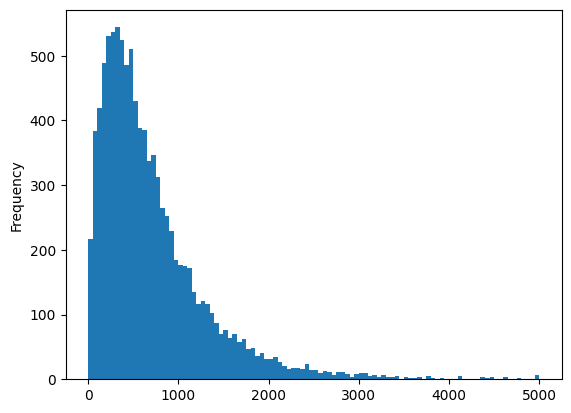

In [ ]:
yelp_df['length'].plot(bins=100, kind='hist')

In [ ]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [ ]:
# Let's see the shortest message
yelp_df[yelp_df['length'] == 1]['text'].iloc[0]

'X'

In [ ]:
# Let's see the message with mean length
yelp_df[yelp_df['length'] == 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

<Axes: xlabel='count', ylabel='stars'>

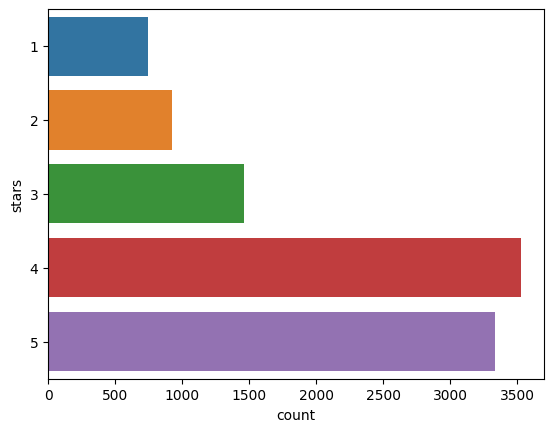

In [ ]:
sns.countplot(y = 'stars', data=yelp_df)

In [ ]:
yelp_df['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In our analysis, it becomes evident that the classes in the Yelp dataset are imbalanced, with varying frequencies across different star ratings. To address this issue, we will explore two distinct scenarios to mitigate the class imbalance.

The first scenario involves combining the reviews with 1, 2, and 3-star ratings into a single class and subsequently adding them to the existing 4 and 5-star classes. As a result, we will have three classes, namely '0'(1-3 stars), '1' (4 stars), and '2' (5 stars). This approach aims to achieve a more balanced representation of the data, allowing for better classification performance.

In the second scenario, we will employ undersampling techniques specifically targeting the class with 1-star ratings. Undersampling involves reducing the number of instances in the majority class to match the minority class. By undersampling the 1-star class, we can effectively balance the dataset while retaining meaningful information and minimizing potential biases.

By implementing these two scenarios, we aim to mitigate the class imbalance challenge and enable more robust and accurate classification in our analysis of the Yelp dataset.

## 1. Combine Multiple star reviews of 1,2 and 3 stars to make the data balance along with 4 and 5 star reviews. Then perform a classification using NLP.

I aim to enhance the analysis of the Yelp dataset, specifically focusing on addressing data imbalance and comparing different approaches. My first objective involves comparing the utilization of TF-IDF (Term Frequency-Inverse Document Frequency) combined with Random Forest and XGBoost, against a scenario without Random Forest, XGBoost, and TF-IDF. Instead, I will employ MultinomialNB (Multinomial Naive Bayes) and CountVectorizer as a one-hot encoder. It is important to note that I will not perform data cleaning in this stage, as my primary focus is to assess the differences between these approaches.

Through this comparative analysis, we aim to gain a deeper understanding of the strengths and limitations of these approaches. By evaluating their performance and observing the differences in classification results, we can make informed decisions about the most suitable methodology for our specific dataset and analytical goals.

My first approach is going to combine starts 1,2 and 3 as start 0. Then start 4 is going to be called "1" and star 5 is "2"

* Star1,2,3= 0
* Start 4= 1
* Start 5= 2

In [ ]:
# Create a new column for the combined star ratings
yelp_df['combined_stars'] = 0

# Map the original star ratings to the new scheme
yelp_df.loc[yelp_df['stars'] <= 3, 'combined_stars'] = 0
yelp_df.loc[yelp_df['stars'] == 4, 'combined_stars'] = 1
yelp_df.loc[yelp_df['stars'] == 5, 'combined_stars'] = 2


In [ ]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,combined_stars
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,2
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,2
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76,1
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419,2
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469,2


In [ ]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   business_id     10000 non-null  object
 1   date            10000 non-null  object
 2   review_id       10000 non-null  object
 3   stars           10000 non-null  int64 
 4   text            10000 non-null  object
 5   type            10000 non-null  object
 6   user_id         10000 non-null  object
 7   cool            10000 non-null  int64 
 8   useful          10000 non-null  int64 
 9   funny           10000 non-null  int64 
 10  length          10000 non-null  int64 
 11  combined_stars  10000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 937.6+ KB


Now we are going to see the percentage of the combined dataset

In [ ]:
print( '0-Stars percentage =', (len(yelp_df.loc[yelp_df['combined_stars'] == 0]) / len(yelp_df) )*100,"%")

0-Stars percentage = 31.369999999999997 %


In [ ]:
print( '1-Stars percentage =', (len(yelp_df.loc[yelp_df['combined_stars'] == 1]) / len(yelp_df) )*100,"%")

1-Stars percentage = 35.260000000000005 %


In [ ]:
print( '2-Stars percentage =', (len(yelp_df.loc[yelp_df['combined_stars'] == 2]) / len(yelp_df) )*100,"%")

2-Stars percentage = 33.37 %


The percentage of the clases are between 31% to 35% is not to much difference but for now we are going to continue in this way.

<Axes: xlabel='combined_stars', ylabel='count'>

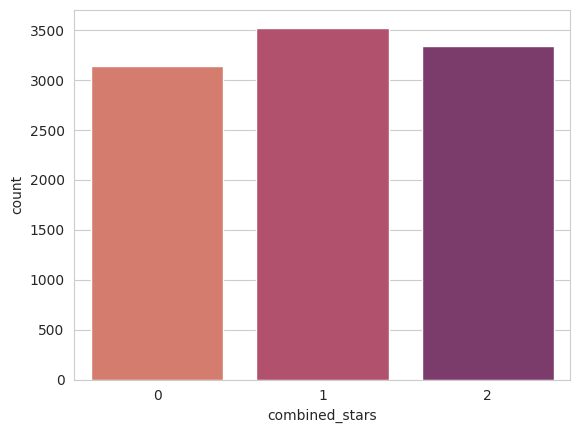

In [ ]:
# See how much the data is imbalance or not
sns.set_style('whitegrid')
sns.countplot(x = 'combined_stars', data = yelp_df, palette = 'flare')

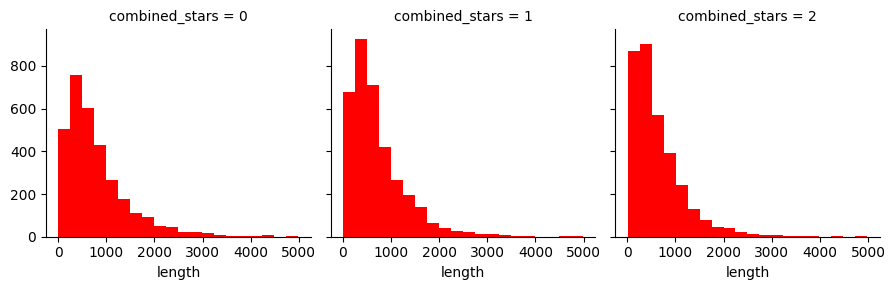

In [ ]:
g = sns.FacetGrid(data=yelp_df, col='combined_stars', col_wrap=3)
g.map(plt.hist, 'length', bins = 20, color = 'r')

Now we have 3 classes almost balance

## 1.1 Scenary with TF_IDF, Random Forest and XGBOOST

### TFIDF Vectorizer

With this approach I will do TFIDF without cleaning to see the results are differents in the model.


In [ ]:
#Creating the instance of TF-IDF
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(yelp_df['text'])

In [ ]:
#Creating the Vectorization Matrix
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,29175,29176,29177,29178,29179,29180,29181,29182,29183,29184
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108668,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model with Random forest Classifier

In [ ]:
# Import Random Forest for classification from sklearn
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X=X_features
y=yelp_df['combined_stars']

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
xgbrf_classifier = xgb.XGBRFClassifier()

In [ ]:
xgbrf_classifier.fit(X_train,y_train)

preds = xgbrf_classifier.predict(X_test)

### Evaluating the model

In [ ]:
# Evalute model predictions using precision and recall
precision = precision_score(y_test, preds, average=None)
recall = recall_score(y_test, preds, average=None)
print('Precision: {} / Recall: {}'.format(precision.mean(), 3), (recall.mean(), 3))

Precision: 0.5245919296707232 / Recall: 3 (0.5284112685284333, 3)


<Axes: >

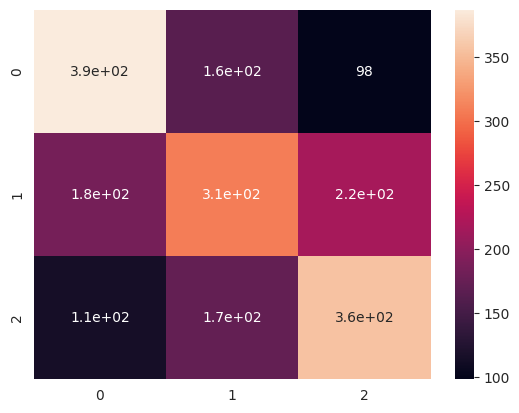

In [ ]:
# Predicting the Test set results
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       649
           1       0.48      0.43      0.46       709
           2       0.53      0.55      0.54       642

    accuracy                           0.53      2000
   macro avg       0.52      0.53      0.53      2000
weighted avg       0.52      0.53      0.52      2000



### Interpretation: Scenario 1.1: TF-IDF, Random Forest, and XGBoost

Accuracy: The accuracy of this scenario is 53%, indicating that the model correctly predicts the star ratings for 53% of the instances in the test set.
Precision and Recall: The precision values for Classes 0, 1, and 2 are 0.56, 0.48, and 0.53, respectively. These values represent the proportion of correctly predicted instances for each class. The recall values for Classes 0, 1, and 2 are 0.60, 0.43, and 0.55, respectively, indicating the model's ability to identify actual positive instance of each class correctly.
F1-score: The F1-scores for Classes 0, 1, and 2 are 0.58, 0.46, and 0.54, respectively. The F1-score combines precision and recall, providing a measure of the overall performance of the model for each class.



## 1.2 Scenary with CountVectorizer, NBmultionamial

### Using CountVectorizer as one-hot-encoder

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()
yelp_countvectorizer = vectorizer.fit_transform(yelp_df['text'])


In [ ]:
print(vectorizer.get_feature_names_out())

['00' '000' '007' ... 'école' 'ém' 'òc']


In [ ]:
print(yelp_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
yelp_countvectorizer.shape

(10000, 29185)

### Using MultinomialNB as model classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = yelp_df['combined_stars'].values

In [ ]:
label

array([2, 2, 1, ..., 1, 0, 2])

In [ ]:
NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB()

### Training the model

In [ ]:
X = yelp_countvectorizer
y = label

In [ ]:
X.shape

(10000, 29185)

In [ ]:
y.shape

(10000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### Evaluating the model

<Axes: >

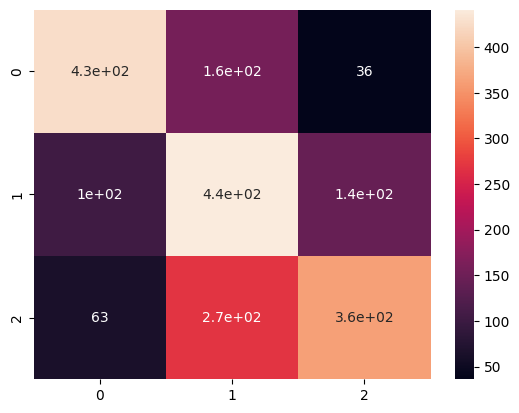

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
# Evalute model predictions using precision and recall
precision = precision_score(y_test, y_predict_test, average=None)
recall = recall_score(y_test, y_predict_test, average=None)
print('Precision: {} / Recall: {}'.format(precision.mean(), 3), (recall.mean(), 3))

Precision: 0.6324673341287784 / Recall: 3 (0.6172473384567523, 3)


In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70       619
           1       0.51      0.64      0.57       687
           2       0.67      0.52      0.59       694

    accuracy                           0.61      2000
   macro avg       0.63      0.62      0.62      2000
weighted avg       0.63      0.61      0.62      2000



## Interpretation: 1.2 Scenary with CountVectorizer, NBmultionamial

Accuracy: The accuracy of this scenario is 61%, indicating a slightly higher accuracy compared to Scenario 1.
Precision and Recall: The precision values for Classes 0, 1, and 2 are 0.72, 0.51, and 0.67, respectively, indicating an improvement in precision compared to Scenario 1. The recall values for Classes 0, 1, and 2 are 0.69, 0.64, and 0.52, respectively, suggesting the model's ability to correctly identify actual positive instances of each class.
F1-score: The F1-scores for Classes 0, 1, and 2 are 0.70, 0.57, and 0.59, respectively, indicating an improvement in the overall performance compared to Scenario 1.

* Comparison

Comparing the two scenarios, Scenario 2 (CountVectorizer and MultinomialNB) demonstrates higher accuracy, precision, recall, and F1-scores for most of the classes (0, 1, and 2). This suggests that the combination of CountVectorizer as a one-hot encoder and MultinomialNB as the classification algorithm performs better in predicting the star ratings in the Yelp dataset.

It is important to note that both scenarios have their strengths and weaknesses, and the choice between them depends on the specific requirements of the analysis and the trade-offs between accuracy, precision, and recall. Further experimentation and fine-tuning may be necessary to optimize the performance of the models in both scenarios.

It's important to note that the choice of the "better" scenario also depends on the specific requirements and objectives of the analysis. It is recommended to further evaluate the models based on other metrics and consider additional factors such as computational efficiency and interpretability before making a final determination.



## 2. Another way to deal with data imbalance could be using a imbalanced data classification instead of combining multiple reviews.

In this analysis, I intend to compare two different scenarios to address the class imbalance in the Yelp dataset. The first scenario involves using TF-IDF in combination with Random Forest and XGBoost, while the second scenario utilizes CountVectorizer as a one-hot encoder and MultinomialNB. However, in this iteration, instead of combining the 1, 2, and 3-star ratings and then concatenated with star 4 and star 5 , I will focus on undersampling techniques using all the individual star ratings. By implementing these two scenarios, I will assess their effectiveness in achieving class balance and improving classification performance. This comparative analysis will provide valuable insights into the impact of different methodologies and their suitability for handling class imbalance in the Yelp dataset.

The objective of this approach is to perform undersampling based on the occurrences of the one-star rating. By implementing undersampling, we aim to balance the dataset by reducing the number of instances in the majority class. Specifically, we will focus on the one-star rating as the reference point for undersampling. This approach ensures that the resulting dataset maintains a more equal representation of each class, thereby mitigating the imbalance issue and facilitating more accurate analyses and predictions.

In [ ]:
# Count the number of occurrences for each star rating
star_counts = yelp_df['stars'].value_counts()

# Define the target number of samples per star rating
target_samples = 749

# Create an empty DataFrame to store the undersampled data
undersampled_df = pd.DataFrame()

# Undersample each star rating based on the target number of samples
for star, count in star_counts.items():
    if count > target_samples:
        subset = yelp_df[yelp_df['stars'] == star].sample(n=target_samples, random_state=42)
    else:
        subset = yelp_df[yelp_df['stars'] == star]

    undersampled_df = undersampled_df.append(subset)

# Reset the index of the undersampled DataFrame
undersampled_df.reset_index(drop=True, inplace=True)

# Check the undersampled DataFrame
undersampled_df['stars'].value_counts()

<ipython-input-221-3554cac641f4>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  undersampled_df = undersampled_df.append(subset)
<ipython-input-221-3554cac641f4>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  undersampled_df = undersampled_df.append(subset)
<ipython-input-221-3554cac641f4>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  undersampled_df = undersampled_df.append(subset)
<ipython-input-221-3554cac641f4>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  undersampled_df = undersampled_df.append(subset)
<ipython-input-221-3554cac641f4>:17: FutureWarning: The frame.append method is deprecated and will be removed from p

4    749
5    749
3    749
2    749
1    749
Name: stars, dtype: int64

I am going to change the values of the stars because XGboost need that the labels begin in zero.

In [ ]:
# Create a new column for the reset star ratings
undersampled_df['reset_stars'] = 0

# Map the original star ratings to the new scheme
undersampled_df.loc[undersampled_df['stars'] == 1, 'reset_stars'] = 0
undersampled_df.loc[undersampled_df['stars'] == 2, 'reset_stars'] = 1
undersampled_df.loc[undersampled_df['stars'] == 3, 'reset_stars'] = 2
undersampled_df.loc[undersampled_df['stars'] == 4, 'reset_stars'] = 3
undersampled_df.loc[undersampled_df['stars'] == 5, 'reset_stars'] = 4

<Axes: xlabel='reset_stars', ylabel='count'>

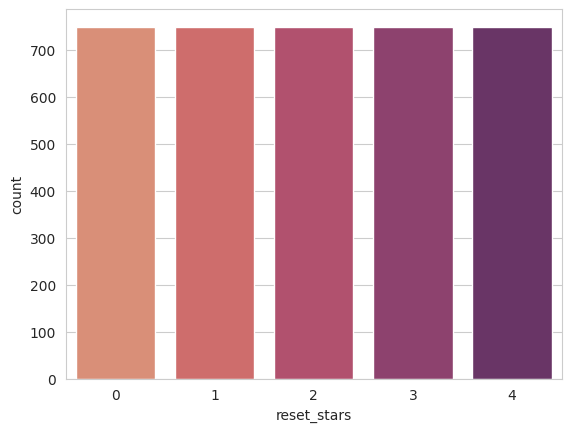

In [ ]:
# See how much the data is balance
sns.set_style('whitegrid')
sns.countplot(x = 'reset_stars', data = undersampled_df, palette = 'flare')

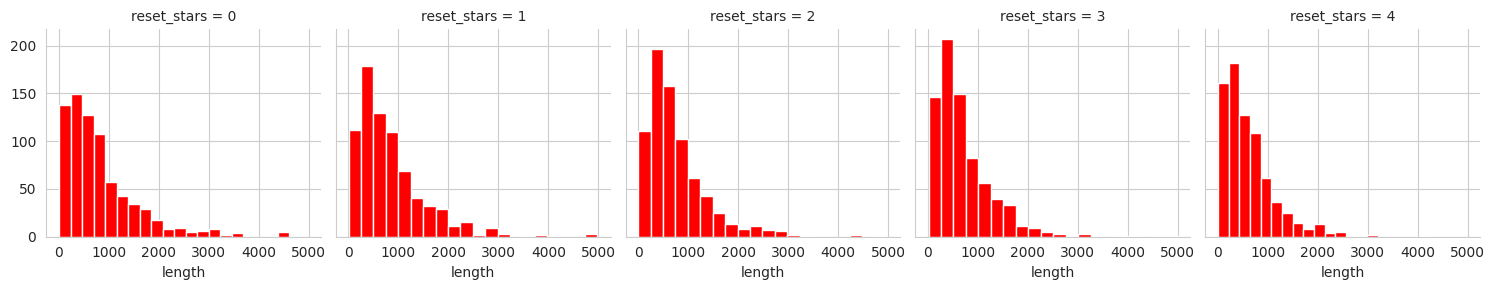

In [ ]:
g = sns.FacetGrid(data=undersampled_df, col='reset_stars', col_wrap=5)
g.map(plt.hist, 'length', bins = 20, color = 'r')

We can visualize the data that is balance

In [ ]:
undersampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3745 entries, 0 to 3744
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   business_id     3745 non-null   object
 1   date            3745 non-null   object
 2   review_id       3745 non-null   object
 3   stars           3745 non-null   int64 
 4   text            3745 non-null   object
 5   type            3745 non-null   object
 6   user_id         3745 non-null   object
 7   cool            3745 non-null   int64 
 8   useful          3745 non-null   int64 
 9   funny           3745 non-null   int64 
 10  length          3745 non-null   int64 
 11  combined_stars  3745 non-null   int64 
 12  reset_stars     3745 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 380.5+ KB


Now we can see that our data is preprocessing and balance base on the counts of the first star.

## 2.1 Scenary with TF_IDF, Random Forest and XGBOOST

### TF-IDF

In [ ]:
#Creating the instance of TF-IDF
tfidf_vect_2 = TfidfVectorizer()
X_tfidf_2 = tfidf_vect_2.fit_transform(undersampled_df['text'])

In [ ]:
#Creating the Vectorization Matrix
X_features_2 = pd.DataFrame(X_tfidf_2.toarray())
X_features_2.head()

,0,1,2,3,4,5,6,7,8,9,...,18865,18866,18867,18868,18869,18870,18871,18872,18873,18874
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X=X_features_2
y=undersampled_df['reset_stars']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 2996
The number of records in the test dataset is 749


In [ ]:
#Create the instance
xgbrf_classifier = xgb.XGBRFClassifier()

In [ ]:
xgbrf_classifier.fit(X_train,y_train)

preds = xgbrf_classifier.predict(X_test)

### Evaluating the model

<Axes: >

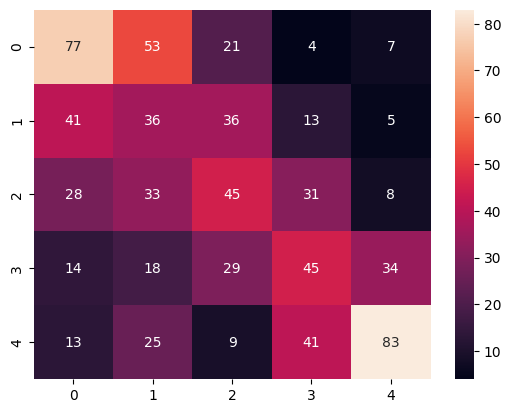

In [ ]:
# Predicting the Test set results
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.45      0.48      0.46       162
           1       0.22      0.27      0.24       131
           2       0.32      0.31      0.32       145
           3       0.34      0.32      0.33       140
           4       0.61      0.49      0.54       171

    accuracy                           0.38       749
   macro avg       0.39      0.37      0.38       749
weighted avg       0.40      0.38      0.39       749



### Interpretation: Scenario 2.1: TF-IDF, Random Forest, and XGBoost

Precision: The overall precision for this scenario is relatively low, ranging from 0.22 to 0.61. This indicates that the models have a significant number of false positives in their predictions.
Recall: The recall values range from 0.27 to 0.49, indicating that the models are moderately successful in capturing actual positive instances. However, the recall rates are not particularly high for any class.
F1-score: The F1-scores range from 0.24 to 0.54, which reflects a moderate level of overall performance in terms of balancing precision and recall.
Accuracy: The overall accuracy for this scenario is 0.38, suggesting that the models correctly classify around 38% of the instances.

 ## 2.2 Scenary with CountVectorizer, NBmultionamial

### Using CountVectorizer as one-hot-encoder

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer()
yelp_countvectorizer = vectorizer.fit_transform(undersampled_df['text'])


In [ ]:
print(vectorizer.get_feature_names_out())

['00' '000' '00a' ... 'zur' 'zweigel' 'zy']


In [ ]:
print(yelp_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.naive_bayes import MultinomialNB

label = undersampled_df['reset_stars'].values

In [ ]:
NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB()

In [ ]:
X = yelp_countvectorizer
y = label

In [ ]:
# Train test split underampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the training dataset is 2996
The number of records in the test dataset is 749


In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### Evaluating the model

<Axes: >

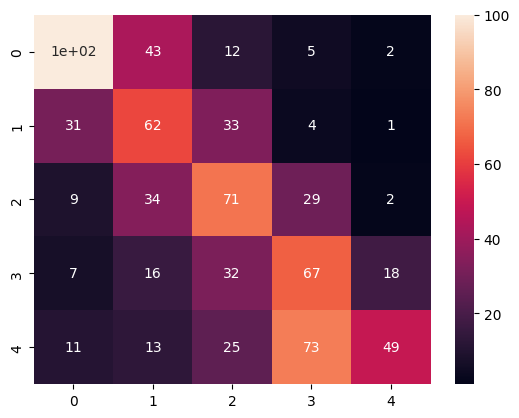

In [ ]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.63      0.62      0.63       162
           1       0.37      0.47      0.41       131
           2       0.41      0.49      0.45       145
           3       0.38      0.48      0.42       140
           4       0.68      0.29      0.40       171

    accuracy                           0.47       749
   macro avg       0.49      0.47      0.46       749
weighted avg       0.51      0.47      0.46       749



### Interpretation: Scenario 2.2: CountVectorizer, MultinomialNB

Precision: The precision values range from 0.37 to 0.68, indicating that the models have a relatively lower rate of false positives compared to Scenario 1.
Recall: The recall values range from 0.29 to 0.62, indicating that the models have a moderate ability to capture actual positive instances. However, the recall rate for Class 4 is relatively low, suggesting challenges in accurately identifying instances of that specific class.
F1-score: The F1-scores range from 0.40 to 0.63, indicating a moderate level of overall performance in terms of balancing precision and recall, with some variation across classes.
Accuracy: The overall accuracy for this scenario is 0.47, suggesting that the models correctly classify around 47% of the instances.


### Intepretation and Comparison of the two scenaries :

* Comparison:

Precision: Scenario 2 shows higher precision values across most classes compared to Scenario 1, indicating a better ability to minimize false positives.
Recall: Scenario 2 generally shows higher recall values, indicating a better ability to capture actual positive instances, except for Class 4, where both scenarios struggle.
F1-score: Scenario 2 generally achieves higher F1-scores, indicating a better overall balance between precision and recall for most classes.
Accuracy: Scenario 2 has a higher overall accuracy, indicating better overall performance in classifying the instances correctly.
In summary, Scenario 2, which utilizes CountVectorizer and MultinomialNB, performs better in terms of precision, recall, F1-score, and overall accuracy compared to Scenario 1, which utilizes TF-IDF, Random Forest, and XGBoost. However, it is important to note that the recall for Class 4 is relatively low in Scenario 2, suggesting a challenge in accurately identifying instances of that specific class.

* Trade-off between precision and recall.

In Scenario 1, which utilizes TF-IDF, Random Forest, and XGBoost, the precision and recall values for each class are relatively low. This indicates that the model struggles to accurately identify both true positive instances (precision) and the overall number of positive instances (recall) for each class. The F1-score, which combines precision and recall, is also moderate.

On the other hand, Scenario 2, which involves CountVectorizer and MultinomialNB, shows higher precision and recall values for most classes. The model performs better in correctly identifying positive instances, resulting in higher recall values. However, the precision values vary across classes.

Overall, Scenario 2 demonstrates better performance in terms of precision and recall compared to Scenario 1. However, it is important to note that there is still room for improvement in both scenarios to achieve higher precision and recall values, especially for specific classes.
Sc

Given the goal of predicting star ratings in the Yelp dataset using NLP techniques, Scenario 2 (CountVectorizer with MultinomialNB) appears to be a more suitable approach. It achieves higher precision, recall, and F1-score values for most classes, resulting in a better balance between correctly classifying instances and overall predictive accuracy.





#Conclusions:

Due to the large size of the dataset, performing a GridSearch for finding the best hyperparameters was not feasible within the resources and computational constraints. GridSearch involves exhaustively searching through all possible combinations of hyperparameters, which can be computationally expensive and time-consuming, especially for large datasets. As a result, I had to use the  default hyperparameter values. Although this approach may not yield the absolute best hyperparameters, it still allows for reasonable model performance while balancing the computational constraints.

It is important to mention that the performance of machine learning models heavily relies on selecting appropriate hyperparameters. It is possible that the Random Forest and XGBoost models in Scenario 1 were not optimized with the best set of hyperparameters, while the MultinomialNB model in Scenario 2 benefited from the default hyperparameter tuning.

In addition, it is worth noting that Random Forest tends to be more computationally expensive compared to MultinomialNB. Random Forest involves constructing multiple decision trees and combining their predictions, which requires more computational resources and time. On the other hand, MultinomialNB is a simpler probabilistic model based on the Bayes' theorem, making it computationally efficient and faster to train and make predictions. Therefore, when dealing with large datasets or situations where computational efficiency is crucial, MultinomialNB may be a more practical choice. However, it is important to consider the trade-off between computational cost and model performance, as Random Forest's higher computational expense can sometimes yield improved accuracy and robustness, especially in complex or highly nonlinear problems.

Last but not least, the performance of different models and feature representations can vary depending on the specific dataset and problem at hand. Therefore, it is recommended to experiment with different approaches, tune the models, and consider the specific characteristics of the dataset to determine the best performing combination for the given task.